In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# see what's in the data directory
from subprocess import check_output
print(check_output(['ls', '../data']).decode('utf8'))

Iris.csv



In [11]:
iris = pd.read_csv("../data/Iris.csv")

In [12]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
iris.shape

(150, 5)

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
iris.drop('Id', axis=1, inplace=True)

In [15]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

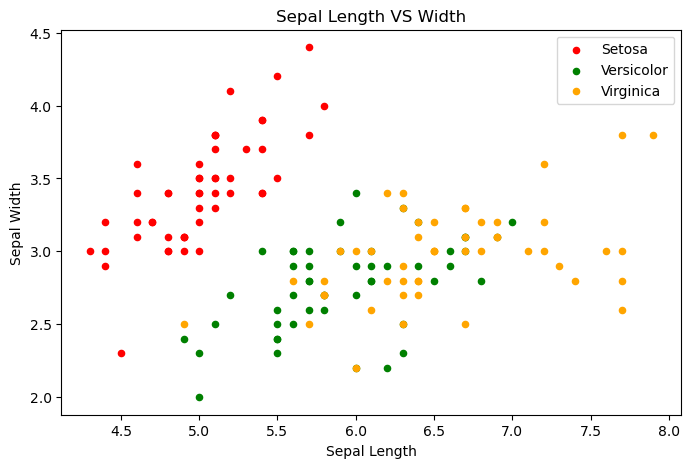

In [20]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length VS Width')

fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

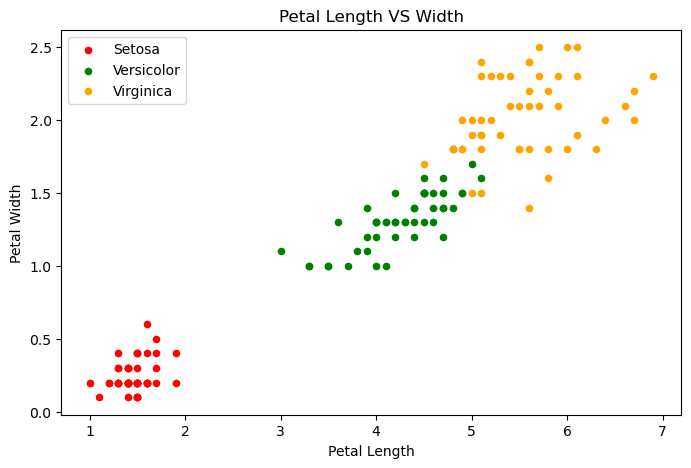

In [22]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='red', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length VS Width')

fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

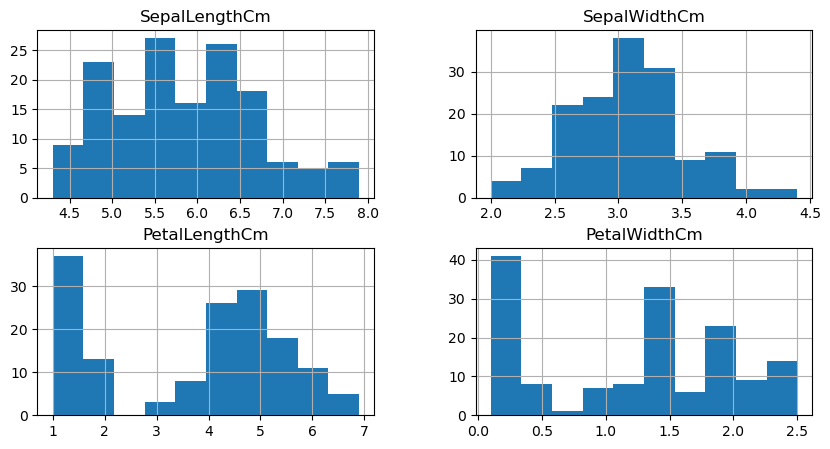

In [28]:
iris.hist()
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

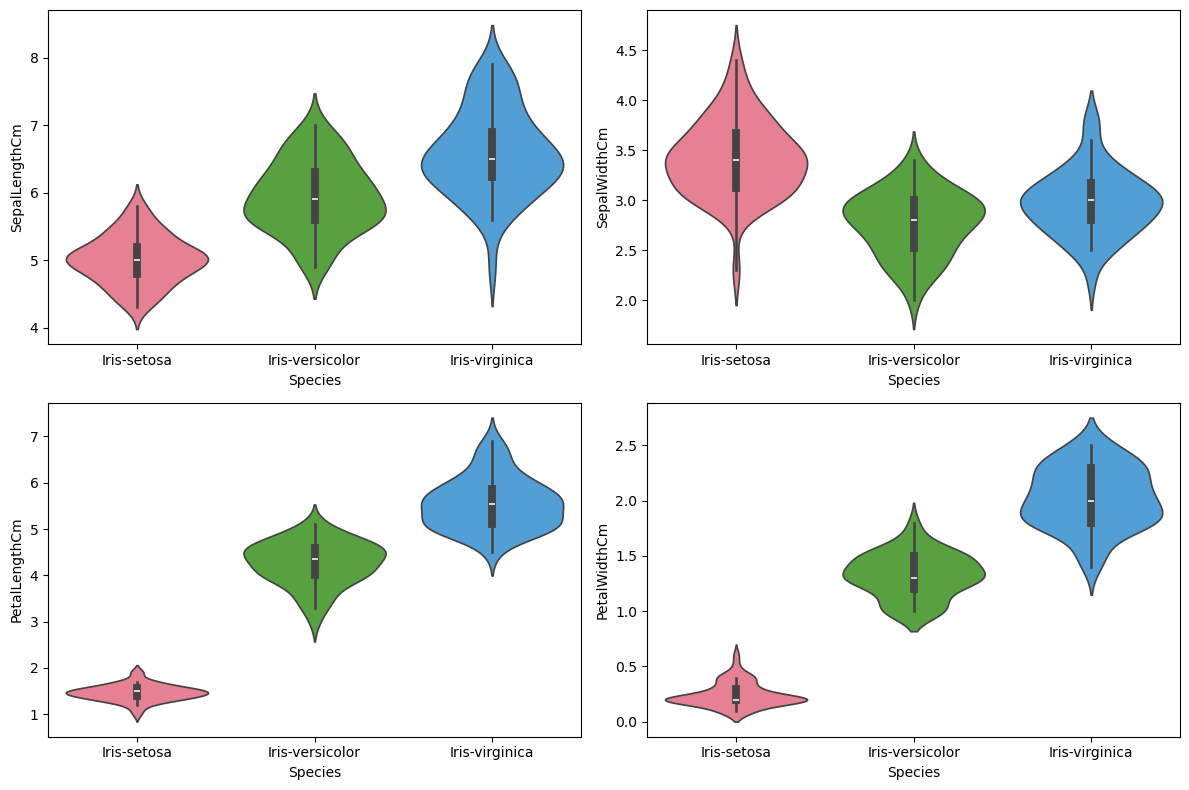

In [42]:
plt.figure(figsize=(12,8))
palette = sns.color_palette('husl', 3)

plt.subplot(2,2,1)
sns.violinplot(x='Species', y='SepalLengthCm', hue='Species', palette=palette, data=iris)

plt.subplot(2,2,2)
sns.violinplot(x='Species', y='SepalWidthCm', hue='Species', palette=palette, data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y='PetalLengthCm', hue='Species', palette=palette, data=iris)

plt.subplot(2,2,4)
sns.violinplot(x='Species', y='PetalWidthCm', hue='Species', palette=palette, data=iris)

plt.tight_layout()
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [51]:
iris['Species'] = iris['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

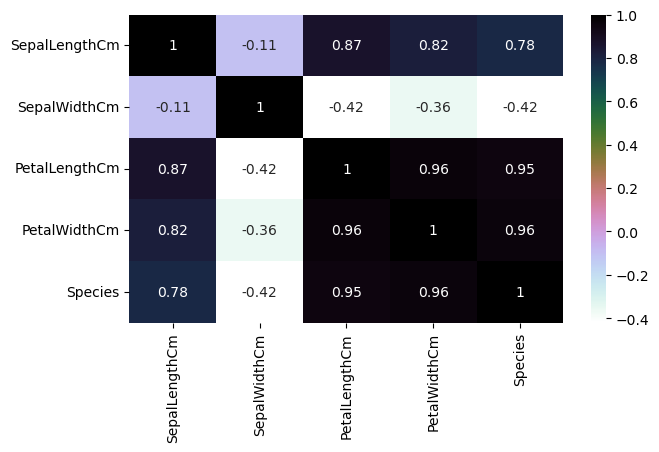

In [52]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()


#### Splitting the Data into Training and Testing Dataset

In [65]:
X = iris.drop('Species', axis=1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

#### SVM

In [66]:
model = svm.SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The Accuracy of the SVM is', metrics.accuracy_score(prediction, y_test))

The Accuracy of the SVM is 0.9333333333333333


#### Decision Tree

In [67]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The Accuracy of the Decision Tree is', metrics.accuracy_score(prediction, y_test))

The Accuracy of the Decision Tree is 0.9111111111111111


#### Logistic Regression

In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The Accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, y_test))

The Accuracy of the Logistic Regression is 0.9111111111111111


#### K-Nearest Neighbours

In [69]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The Accuracy of KNN is', metrics.accuracy_score(prediction, y_test))

The Accuracy of KNN is 0.9333333333333333


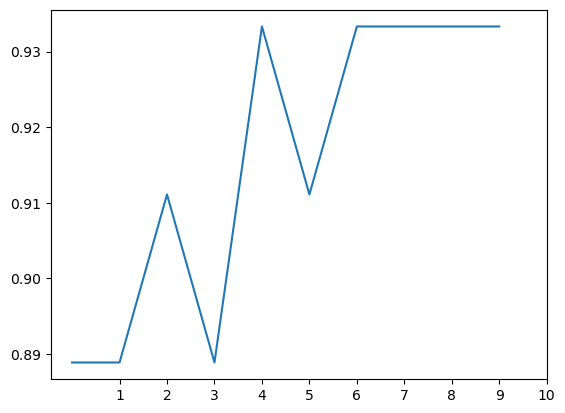

In [82]:
accuracy_list = []

for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = metrics.accuracy_score(prediction, y_test)
    accuracy_list.append(accuracy)

plt.plot(accuracy_list)
plt.xticks(list(range(1, 11)))
plt.show()